In [73]:
import numpy as np          
import pandas as pd    
import matplotlib.pyplot as plt             
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [74]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
data=data.drop(columns=['Id', 'PetalLengthCm','PetalWidthCm'], axis=1)
data

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [76]:
data['Species']=np.where(data['Species']== 'Iris-setosa', 1,0)

In [77]:
data

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

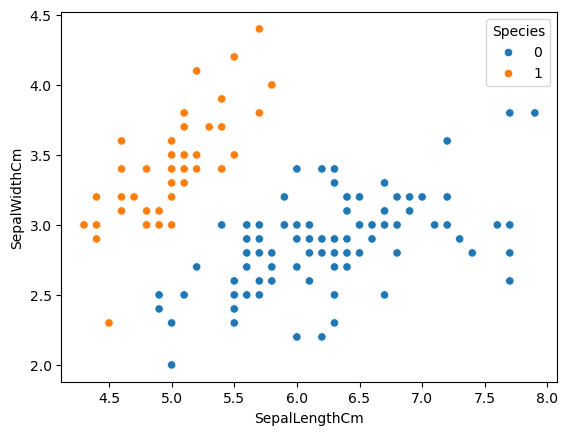

In [78]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)

In [79]:
import numpy as np

class Logistic():
    def __init__(self, alpha, epoch):
        self.alpha = alpha
        self.epoch = epoch
        self.weight = None
        self.log_loss = []

    def sigmoid_function(self, z):
        return 1 / (1 + np.exp(-z))  

    def fit(self, x, y):
        sample, features = x.shape
        x = np.hstack((np.ones((sample, 1)), x))  
        self.weight = np.zeros((features + 1, 1)) 
        y = y.reshape(-1, 1)  

        for _ in range(self.epoch):
            for index, x_i in enumerate(x):
                linear_output = np.dot(x_i, self.weight)
                y_pred = self.sigmoid_function(linear_output)
                error = y_pred - y[index]
                self.weight -= self.alpha * error * x_i.reshape(-1, 1)

    def predict(self, x):
        sample, features = x.shape
        x = np.hstack((np.ones((sample, 1)), x))
        linear_output = np.dot(x, self.weight)
        probabilities = self.sigmoid_function(linear_output)
        return (probabilities >= 0.5).astype(int)




    

In [80]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, )


In [83]:

model=Logistic(alpha=0.01, epoch=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy :", r2_score(y_test, y_pred))

Accuracy : 0.8412698412698413


In [84]:
model.weight

array([[ 1.71555623],
       [-6.40282736],
       [10.52342728]])

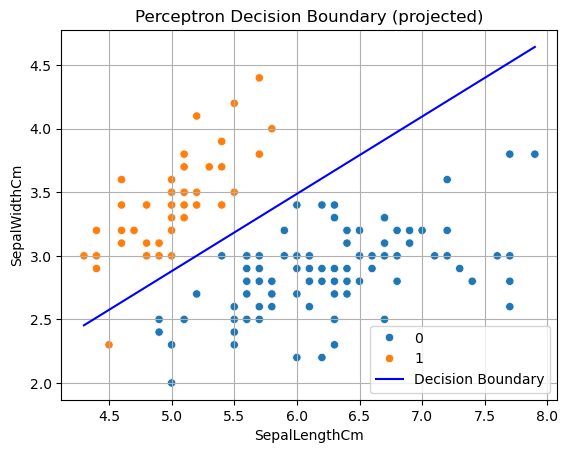

In [86]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species', data=data)
theta = model.weight.flatten()



x_vals = np.linspace(data['SepalLengthCm'].min(), data['SepalLengthCm'].max(), 100)

y_vals = -(theta[0] + theta[1]*x_vals )/theta[2]

plt.plot(x_vals, y_vals, color='blue', label='Decision Boundary')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Perceptron Decision Boundary (projected)')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
build_in=LogisticRegression()
build_in.fit(x_train , y_train.flatten())
print("accuracy :", r2_score(y_test,build_in.predict(x_test)))

accuracy : 1.0


In [91]:
print(build_in.coef_)
print(build_in.intercept_)

[[-3.01783339  3.10413979]]
[6.51938627]
